In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import os

import models
from train_gan import train_step, train
from evaluation import get_rmse_on_batch, get_prmsd_on_batch, get_mae_on_batch

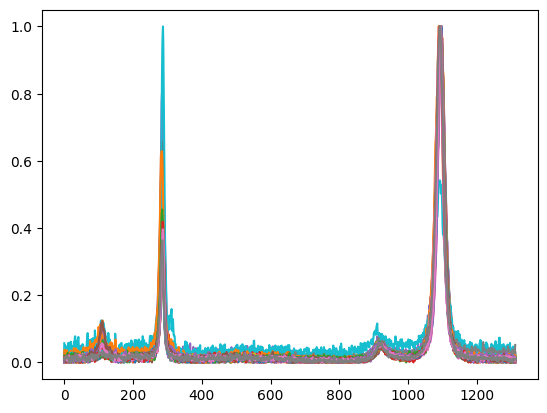

In [2]:
df = pd.read_csv('./Dataset/tBLG/tBLG_raw.csv',delimiter=';',skiprows=1,index_col=None,header=None)
X, Y = np.array(df.iloc[99:209,0:-1]),np.array(df.iloc[99:209,-1])# 0-6:SLG, 6:71:0-9°,71:99:9-20°, 99-209: 20-30°
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.2,random_state=2)
BATCH_SIZE = 4
data_size = train_data.shape[0]
feature_dim = train_data.shape[1]
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(data_size).batch(BATCH_SIZE)

plt.plot(np.transpose(train_data))
plt.show()

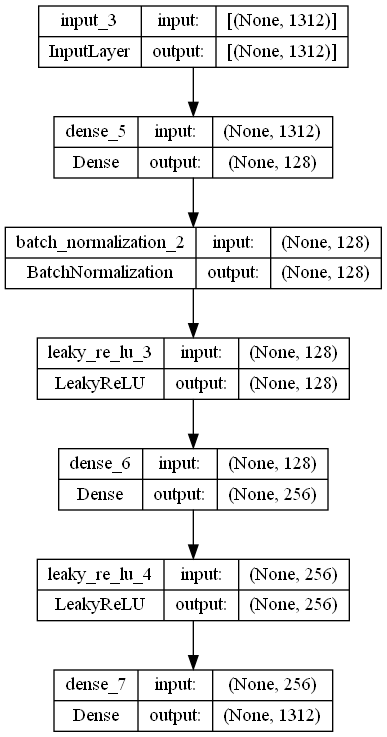

In [3]:
gan_model = models.GANModel(feature_dim)
generator = gan_model.Generator_GAN()
plot_model(generator,show_shapes=True)

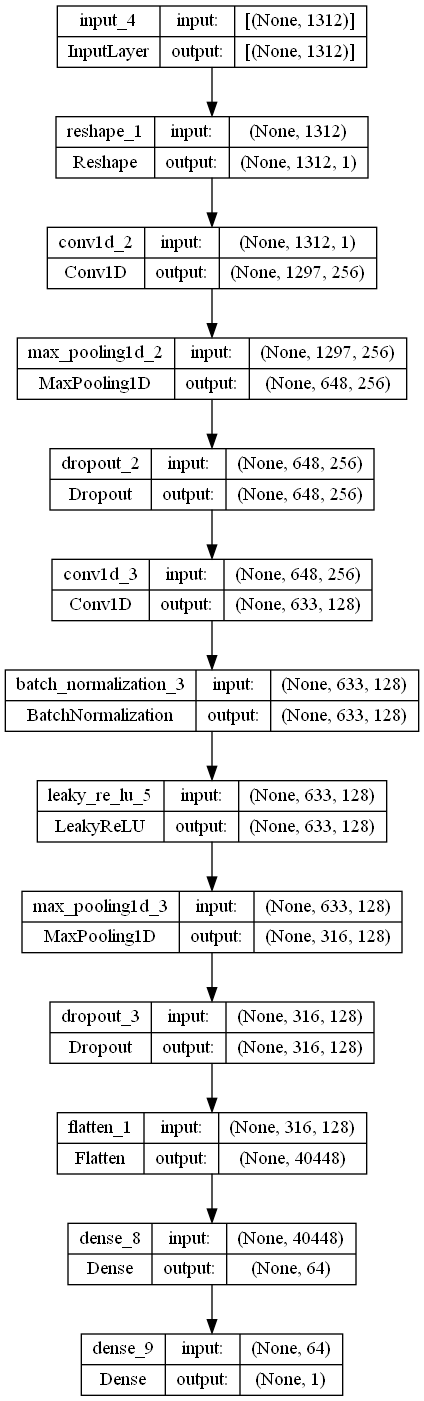

In [4]:
discriminator = gan_model.Discriminator_GAN()
plot_model(discriminator,show_shapes=True)

In [5]:
epochs = numofEPOCHS = 10000

generator_optimizer = tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer = tf.keras.optimizers.RMSprop(1e-5)

checkpoint_dir = 'training_checkpoints/'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [6]:
epochs_gen_losses, epochs_disc_losses, epochs_accuracies = train(train_dataset, epochs, gan_model.generator, gan_model.discriminator, noise_dim=feature_dim,checkpoint=checkpoint, checkpoint_prefix=checkpoint_prefix)

Epoch: 1/10000
Generator Loss: 3.810765266418457, Discriminator Loss: 0.3341202139854431
Epoch: 2/10000
Generator Loss: 5.570306777954102, Discriminator Loss: 0.032645173370838165
Epoch: 3/10000
Generator Loss: 7.104485988616943, Discriminator Loss: 0.008444994688034058
Epoch: 4/10000
Generator Loss: 8.193002700805664, Discriminator Loss: 0.0023457531351596117
Epoch: 5/10000
Generator Loss: 9.434874534606934, Discriminator Loss: 0.0007385954377241433
Epoch: 6/10000
Generator Loss: 10.70828914642334, Discriminator Loss: 0.0002329406706849113
Epoch: 7/10000
Generator Loss: 11.710675239562988, Discriminator Loss: 8.932148921303451e-05
Epoch: 8/10000
Generator Loss: 13.343707084655762, Discriminator Loss: 2.8245682187844068e-05
Epoch: 9/10000
Generator Loss: 13.646822929382324, Discriminator Loss: 1.0977976671711076e-05
Epoch: 10/10000
Generator Loss: 14.864034652709961, Discriminator Loss: 3.6611991163226776e-06
Epoch: 11/10000
Generator Loss: 15.7969331741333, Discriminator Loss: 1.99642